# 1. Import and Install Dependencies

In [18]:
%pip install tensorflow opencv-python numpy mediapipe scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\LUKE\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [19]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [20]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities
mp_selfie_segmentation = mp.solutions.selfie_segmentation # Segmentation masking

In [26]:
# potential TODOs: 
# -> add hand specific segmentation for better detections
# -> apply joint bilateral filter to results.segmentation_mask w/ image

def mediapipe_segmentation(image):
    bg_image = None                                             # Can set color or image as bg if desired
    image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                               # Image is no longer writeable
    results = selfie_segmentation.process(image)                # Apply segmentation mask
    image.flags.writeable = True                                # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)              # COLOR COVERSION RGB 2 BGR
    
    # referenced nicolai nielsen segmentation tutorial #
    # Draw segmentation on background of video
    condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1 #was 0.15
    
    # Filter background
    # Can apply an image or flat color instead of blur, but would need implimentation atm
    if bg_image is None:
        bg_image = cv2.GaussianBlur(image, (55,55),0)

    output_image = np.where(condition, image, bg_image)
    return output_image

In [22]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [23]:
def draw_landmarks(image, results):
 #   mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
 #   mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [24]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
    #                          mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
    #                          mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
    #                          ) 
    # # Draw pose connections
    # mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
    #                          mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
    #                          mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
    #                          ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [28]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
# \ for newline wrap on with statement
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5, model_complexity=2) as holistic, \
    mp_selfie_segmentation.SelfieSegmentation(model_selection=0) as selfie_segmentation:

    '''
    Test and see on gestures that have more movement if we should add the parameter model_complexity =2
    0 it will be faster, but less accurate and if it is 2 it will be more accurate, but also slower.

    '''
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Segment video background
        frame = mediapipe_segmentation(frame)

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [ ]:
'''

import cv2

# IP address and port number of your Android device running IP Webcam
url = 'https://10.0.0.144:8080/video'

# Create a VideoCapture object with the URL of the IP Webcam stream
cap = cv2.VideoCapture(url)

# Check if the camera is opened successfully
if not cap.isOpened():
    print("Failed to open the camera.")
else:
    print("Camera opened successfully.")

while cap.isOpened():
    # Read frame
    ret, frame = cap.read()

    if not ret:
        print("Failed to capture frame from camera.")
        break

    # Display the frame
    cv2.imshow('Android Camera Feed', frame)

    # Break the loop when 'q' is pressed
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Release the VideoCapture and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()
'''

In [ ]:
draw_landmarks(frame, results)

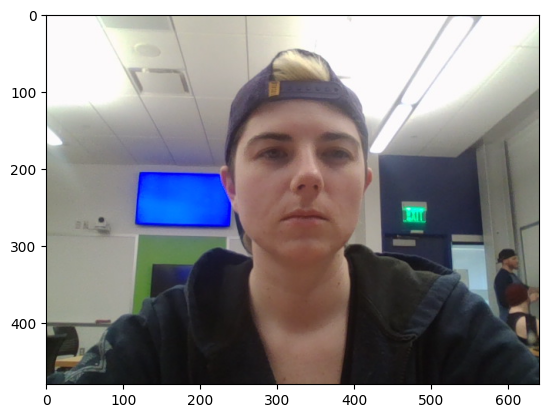

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [ ]:
len(results.left_hand_landmarks.landmark)

In [ ]:
# Use pose maybe with more complicated gestures for more data 
'''
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

'''

In [ ]:
#pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
#face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [ ]:
def extract_keypoints(results):
   # pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
   # face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh, rh])

In [ ]:
result_test = extract_keypoints(results)

In [ ]:
result_test

# 4. Setup Folders for Collection

In [ ]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('Test Data') 

# Actions that we try to detect
alphabets = np.array(['A', 'B', 'C'])
actions = np.array(['hello', 'more', 'iloveyou'])



no_sequences = 30  # Videos
sequence_length = 30  # Frames as .npy files

# Folder start
start_folder = 30

In [ ]:
# List of tuples containing folder names and corresponding items
folders_and_items = [('alphabet', alphabets)]

def create_folders(folder_name, items):
    folder_path = os.path.join(DATA_PATH, folder_name)
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print(f"Created directory: {folder_path}")

    for item in items:  
        item_folder_path = os.path.join(folder_path, item)                                       
        if not os.path.exists(item_folder_path):
            os.makedirs(item_folder_path)
            print(f"Created directory: {item_folder_path}")

        # Create sequence folders inside each item folder
        for sequence in range(1, no_sequences + 1):
            sequence_path = os.path.join(item_folder_path, str(sequence))
            if not os.path.exists(sequence_path):
                os.makedirs(sequence_path)
                print(f"Created directory: {sequence_path}")

# Create folders for actions and alphabets
for folder_name, items in folders_and_items:
    create_folders(folder_name, items)



    

NameError: name 'alphabets' is not defined

# 5. Collect Keypoint Values for Training and Testing

In [ ]:
import cv2


# Set up video capture
cap = cv2.VideoCapture(0)
export_complete = False  # Flag to track completion status

# Set mediapipe model 
with mp.solutions.holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5, model_complexity=2) as holistic:

    paused = False  # Initialize the pause state
    while True:  # Infinite loop for continuous processing    
        if not paused and not export_complete: 
            # Loop through the list of tuples
            for folder_name, items in folders_and_items:
                # Loop through items (actions or alphabets)
                for item in items:
                    # Show message for the next action or alphabet
                    cv2.putText(image, f'Next {folder_name}: {item}', (120, 200), 
                                cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(3000)  # Wait for 3 seconds

                    # Loop through sequences aka videos
                    for sequence in range(1, no_sequences + 1):
                        # Loop through video length aka sequence length
                        for frame_num in range(sequence_length):
                            # Read feed
                            ret, frame = cap.read()

                            # Make detections
                            image, results = mediapipe_detection(frame, holistic)

                            # Draw landmarks
                            draw_styled_landmarks(image, results)

                            # Apply wait logic
                            if frame_num == 0: 
                                cv2.putText(image, 'STARTING COLLECTION', (120, 200), 
                                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                                cv2.putText(image, f'Collecting frames for {item} Video Number {sequence}', (15, 12), 
                                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                                # Show to screen
                                cv2.imshow('OpenCV Feed', image)
                                cv2.waitKey(4000)
                            else: 
                                cv2.putText(image, f'Collecting frames for {item} Video Number {sequence}', (15, 12), 
                                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                                # Show to screen
                                cv2.imshow('OpenCV Feed', image)

                            # Export keypoints
                            if sequence in range(1, 41):  # Ensure saving keypoints only for frames within the sequence length
                                keypoints = extract_keypoints(results)
                                npy_path = os.path.join(DATA_PATH, folder_name, item, str(sequence), str(frame_num + 1)) + ".npy"
                                np.save(npy_path, keypoints)

                            # Check if keypoints export is complete
                            if sequence == no_sequences and frame_num == sequence_length - 1:
                                export_complete = True

                            # Break gracefully
                            if cv2.waitKey(10) & 0xFF == ord('q'):
                                raise KeyboardInterrupt

                            # Check for pause key (spacebar)
                            key = cv2.waitKey(1)
                            if key == ord(' '):  # Spacebar pressed
                                paused = not paused  # Toggle the paused state

                                # If paused, wait for a key press to resume
                                if paused:
                                    cv2.waitKey(-1)  # Wait indefinitely for a key press

        # If export is complete, break the loop
        if export_complete:
            break

cap.release()
cv2.destroyAllWindows()


NameError: name 'folders_and_items' is not defined

In [ ]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [ ]:
alphabet_map = {label:num for num, label in enumerate(alphabets)}

In [ ]:
import os
import numpy as np

alphabet_folder_path = os.path.join(DATA_PATH, 'alphabet') 


# Initialize the sequences and labels lists
alph_sequences, alph_list_labels = [], []

# Loop through the alphabets
for alphabet in alphabets:
    # Get the sequence directories for the current alphabet
    sequence_dirs = os.listdir(os.path.join(alphabet_folder_path, alphabet))
    
    # Loop through the sequence directories
    for sequence_dir in sequence_dirs:
        # Initialize the window list for the current sequence
        window = []
        
        # Loop through the .npy files in the current sequence directory
        for frame_num in range(sequence_length):
            # Load the .npy file
            res = np.load(os.path.join(DATA_PATH, 'alphabet', alphabet, sequence_dir, "{}.npy".format(frame_num + 1)))
            
            # Append the loaded .npy file to the window list
            window.append(res)
        
        # Append the window list to the sequences list
        alph_sequences.append(window)
        
        # Append the label for the current alphabet to the labels list
        alph_list_labels.append(alphabet_map[alphabet]) # Use alphabet as the label


        "Number of sequences and labels should be the number of items inside the gesture folder"

print("Number of sequences:", len(alph_sequences))
print("Number of labels:", len(alph_list_labels))


In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Convert labels to categorical
y = to_categorical(alph_list_labels).astype(int)

# Ensure shapes are consistent
print("Shapes of sequences and labels:")
print("Sequences shape:", np.array(alph_sequences).shape)
print("Labels shape:", np.array(alph_list_labels).shape)

# Split data into training and testing sets
X = np.array(alph_sequences)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Verify shapes after splitting
print("Shapes after splitting:")
print("X_train shape:", X_train.shape)  # Labels of train shape
print("X_test shape:", X_test.shape)   # Labels of 5 random test 
print("y_train shape:", y_train.shape)      #(train shape, classes)
print("y_test shape:", y_test.shape)       

# Inspect testing labels
print("Testing labels:")
print(y_test)


NameError: name 'alph_list_labels' is not defined

In [ ]:
# Iterate through the testing set and print labels and sequences
for i in range(len(y_test)):
    label = y_test[i]
    sequence = X_test[i]
    print(f"Label: {label}, Sequence Frame: {sequence}")


In [ ]:
import os
import pickle

# Model names with gestures
# actions = np.array(['nothing', 'hello', 'more'])
alphabets = np.array(['A', 'B', 'C'])

# Define the folder path
folder_path = 'Model Labels'

# Check if the folder exists, if not, create it
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Save the variables to a file using pickle
data = {
    # 'actions': actions,
    'alphabets': alphabets,
}

file_path = os.path.join(folder_path, 'model_data.pkl')

with open(file_path, 'wb') as f:
    pickle.dump(data, f)


# 7. Build and Train LSTM Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [ ]:
alphabet_model = Sequential()
alphabet_model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,126)))
alphabet_model.add(LSTM(128, return_sequences=True, activation='relu'))
alphabet_model.add(LSTM(64, return_sequences=False, activation='relu'))
alphabet_model.add(Dense(64, activation='relu'))
alphabet_model.add(Dense(32, activation='relu'))
alphabet_model.add(Dense(alphabets.shape[0], activation='softmax'))

In [ ]:
alphabet_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
alphabet_model.fit(X_train, y_train, epochs=500, callbacks=[tb_callback])

In [ ]:
alphabet_model.summary()

# 8. Make Predictions

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

# Get predictions for the test set
res = alphabet_model.predict(X_test)

# Print the predicted action for the 5th sample in the test set
print("Predicted action:", alphabets[np.argmax(res[4])])

# Print the actual action for the 5th sample in the test set
print("Actual action:", alphabets[np.argmax(y_test[4])])

# Convert predictions and true labels to indices
yhat = np.argmax(res, axis=1)
ytrue = np.argmax(y_test, axis=1)

# Calculate the multilabel confusion matrix
confusion_matrix = multilabel_confusion_matrix(ytrue, yhat)
print("Multilabel Confusion Matrix:")
print(confusion_matrix)

# Calculate the accuracy score
accuracy = accuracy_score(ytrue, yhat)
print("Accuracy Score:", accuracy)


# 9. Save Weights

In [ ]:
# Save the model

models_folder = 'models'

alphabet_model.save(os.path.join(models_folder,'alphabet.h5'))  # change this per model

# 10. Load Models and labels to Run in Real Time if they are not stored in the Kernal

In [ ]:
DATA_PATH = os.path.join('PreTrained')
alphabet_folder_path = os.path.join(DATA_PATH, 'alphabet') 
action_folder_path = os.path.join(DATA_PATH, 'action')
                                  
                            

import os
import pickle

# Define the folder path
folder_path = 'Model Labels'

# Define the file path
file_path = os.path.join(folder_path, 'model_data1.pkl')

# Load the data from the file
with open(file_path, 'rb') as f:
    data = pickle.load(f)

# Retrieve the variables from the loaded data dictionary
actions = data['actions']  # Uncomment if you have 'actions' saved
#alphabets = data['alphabets']

#print(alphabets)
print(actions)


In [ ]:
DATA_PATH = os.path.join('PreTrained')
alphabet_folder_path = os.path.join(DATA_PATH, 'alphabet') 
action_folder_path = os.path.join(DATA_PATH, 'action')
                                  
                            

import os
import pickle

# Define the folder path
folder_path = 'Model Labels'

# Define the file path
file_path = os.path.join(folder_path, 'model_data.pkl')

# Load the data from the file
with open(file_path, 'rb') as f:
    data = pickle.load(f)

# Retrieve the variables from the loaded data dictionary
#actions = data['actions']  # Uncomment if you have 'actions' saved
alphabets = data['alphabets']

print(alphabets)
print(actions)


In [ ]:
alphabets = (['A', 'B', 'C'])
actions = (['hello', 'more', 'iloveyou'])

In [ ]:
"Inport the previous models after restart or when we train a new model to load the previous model"

from keras.models import load_model
import os

# Define the folder containing the models
models_folder = 'models'

# # Load the action model
action_model_filename = 'action.h5'
action_model_filepath = os.path.join(models_folder, action_model_filename)
try:
     action_model = load_model(action_model_filepath)
     print(f"Action model {action_model_filename} loaded successfully.")
except Exception as e:
     print(f"Error loading action model {action_model_filename}: {str(e)}")

# Load the alphabet model
alphabet_model_filename = 'alphabet.h5'
alphabet_model_filepath = os.path.join(models_folder, alphabet_model_filename)
try:
    alphabet_model = load_model(alphabet_model_filepath)
    print(f"Alphabet model {alphabet_model_filename} loaded successfully.")
except Exception as e:
    print(f"Error loading alphabet model {alphabet_model_filename}: {str(e)}")



Action model action.h5 loaded successfully.
Alphabet model alphabet.h5 loaded successfully.


# 11. Test in Real Time

In [ ]:
from scipy import stats

In [ ]:
# Define the prob_viz function
def prob_viz(prediction_labels, input_frame):
    output_frame = input_frame.copy()
    y_offset = 60
    for i, label in enumerate(prediction_labels):
        cv2.putText(output_frame, label, (20, y_offset + i * 40), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2, cv2.LINE_AA)
    return output_frame

In [ ]:
                                            # Testing One Model Only
sequence = []
sentence = []
predictions = []
threshold = 1

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = alphabet_model.predict(np.expand_dims(sequence, axis=0))[0]
            predicted_label = alphabets[np.argmax(res)]
            predictions.append(predicted_label)
            
            if np.unique(predictions[-5:])[0] == predicted_label and res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if predicted_label != sentence[-1]:
                        sentence.append(predicted_label)
                else:
                    sentence.append(predicted_label)

            if len(sentence) > 5: 
                sentence = sentence[-5:]


            # Display the label text only
            
            image = prob_viz(predicted_label, image)


            # Show the image with the label text
            cv2.imshow('OpenCV Feed', image)


        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Release the video capture and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
# Define the prob_viz function to handle both alphabet and action labels
def prob_viz(prediction_label, input_frame):
    output_frame = input_frame.copy()
    y_offset = 60
    cv2.putText(output_frame, prediction_label, (20, y_offset), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2, cv2.LINE_AA)
    return output_frame

# Testing Both Models
sequence = []
sentence = []
threshold = 1
current_prediction = ""

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # Initialize predictions list for each iteration
        predictions = []

        # Prediction logic for the alphabet model
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            # Prediction logic for the alphabet model
            res_alphabet = alphabet_model.predict(np.expand_dims(sequence, axis=0))[0]
            predicted_label_alphabet = alphabets[np.argmax(res_alphabet)]
            predictions.append(predicted_label_alphabet)
            
            # Logic for sentence formation
            if np.unique(predictions[-5:])[0] == predicted_label_alphabet and res_alphabet[np.argmax(res_alphabet)] > threshold: 
                if len(sentence) > 0: 
                    if predicted_label_alphabet != sentence[-1]:
                        sentence.append(predicted_label_alphabet)
                else:
                    sentence.append(predicted_label_alphabet)

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Predict using the action model
            res_action = action_model.predict(np.expand_dims(sequence, axis=0))[0]
            predicted_label_action = actions[np.argmax(res_action)]
            predictions.append(predicted_label_action)

            # Display the label text for both alphabet and action
            current_prediction = " ".join(predictions)
            image = prob_viz(current_prediction, image)

        # Show the image with the label text
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Release the video capture and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
cap.release()
cv2.destroyAllWindows()